# Trabajo Practico Nº 3
## SVM

### Se conjunto de datos creados TP3-1 en R2 
### Lineamente separables 
\begin{align*}
\large y = 2x - 4 \text{(Funcion de la recta)} \\
\end{align*}





### Conjuntos de datos TP3-1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Establecer una semilla aleatoria para la reproducibilidad
np.random.seed(0)

# Generar puntos aleatorios en el rango [0, 5] × [0, 5]
num_points = 20
x1 = np.random.uniform(0, 5, num_points)
x2 = np.random.uniform(0, 5, num_points)

# Definir la línea de separación
# Por ejemplo, y = 2x - 4
def separador(x):
    return 2 * x  - 4

# Asignar etiquetas de clase 1 o -1 según la posición con respecto a la línea
y_real = np.where(x2 >= separador(x1), 1, -1)

# Visualizar los datos
plt.scatter(x1[y_real == 1], x2[y_real == 1], label='Clase 1')
plt.scatter(x1[y_real == -1], x2[y_real == -1], label='Clase -1')
plt.plot([0, 5], [separador(0), separador(5)], color='#A5DF00', linestyle='--', label='Línea de separación')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend(loc='lower left',bbox_to_anchor=(1, 0.5))
plt.title('TP3-1')
plt.ylim(bottom=-4,top=6)
plt.show()


Se pude visualizar que el ___hiperplano___ de separación esta haciendo una buena clasificación de las clase pero no podemos garantizar que sea el optimo ya que hay puntos que se encuentra muy cerca del ___hiperplano___

## Se crea un perceptron simple escalon


In [ ]:
# Función para crear un perceptron simple
# Función de activación

def step_activation(sum):
    return 1 if sum >= 0 else - 1

# Algoritmo de entrenamiento del perceptrón 

def train_perceptron(X, y, learning_rate, epochs=10):
    #Inicializar pesos y sesgo
    num_features = X.shape[1]
    w = np.zeros(num_features)
    b = 0
    
    for epoch in range(epochs):
        for i in range(X.shape[0]):
            sum = np.dot(X[i], w ) + b
            y_pred = step_activation(sum)
            
            # Actualiza pesos y sesgo
            if y[i] != y_pred:
                w += learning_rate * y[i] * X[i]
                b += learning_rate * y[i]
    return w ,b 



### Entrenamiento del preceptrón con el conjunto de datos TP3-1

In [ ]:
# Combina los 2 arreglos y los transpone 
# Datos de entrenamiento
X1 = np.vstack((x1, x2)) . T
y = y_real

# Entrenar perceptron
learning_rate = 0.01
epochs = 10000
w, b = train_perceptron(X1, y, learning_rate, epochs)

predicciones = [step_activation(np.dot(x,w) + b) for x in X1]


### Grafica comparativa entre la separación real y la separación del perceptrón

In [ ]:
# Crear la gráfica
plt.scatter(x1[y_real == 1], x2[y_real == 1], label='Clase 1')
plt.scatter(x1[y_real == -1], x2[y_real == -1], label='Clase -1')
plt.plot([0, 5], [separador(0), separador(5)], color='#A5DF00', linestyle='--', label='Línea de separación (Real)')
plt.plot([0, 5], [-(w[0]/w[1])*0 + (-b/w[1]), -(w[0]/w[1])*5 + (-b/w[1])], color='#8258FA', linestyle='-.', label='Línea de separación (Perceptrón)')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend(loc='lower left', bbox_to_anchor=(1, 0.5))
plt.title('TP3-1 perceptrón')
plt.ylim(bottom=-4,top=6)
plt.show()

# SVM TP3-1 Obtener Hiperplano Optimo

In [ ]:
# Aca poner la implementacion del hiperplano optimo

### Conjunto de datos TP3-2

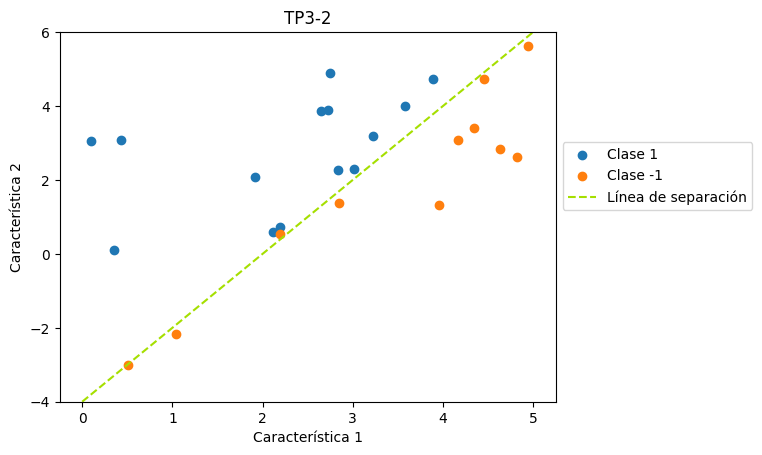

In [27]:
'''
    Se crea un nuevo conjunto de datos
    Se utiliza el conjunto de datos ya creado anteriormente
    X1 y se usa el mismo separador y_real
    Luego se genera pto mal clasificados y se agrega al conjunto de datos
'''

# Generar pto mal clasificados
num_mal_clasificados = 5
x1_mal = np.random.uniform(0, 5, num_mal_clasificados)
x2_mal = separador(x1_mal) + np.random.uniform(-0.5, 0.5, num_mal_clasificados)
y_mal = -y_real[:num_mal_clasificados]

# Añadir al conjunto X1 los pto mal clasificados
x1 = np.concatenate([x1, x1_mal])
x2 = np.concatenate([x2, x2_mal])
y_real = np.concatenate([y_real, y_mal])

# Visualizar los datos
plt.scatter(x1[y_real == 1], x2[y_real == 1], label='Clase 1')
plt.scatter(x1[y_real == -1], x2[y_real == -1], label='Clase -1')
plt.plot([0, 5], [separador(0), separador(5)], color='#A5DF00', linestyle='--', label='Línea de separación')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend(loc='lower left',bbox_to_anchor=(1, 0.5))
plt.title('TP3-2')
plt.ylim(bottom=-4,top=6)
plt.show()

### Conjunto TP3-2 no linealmente separable

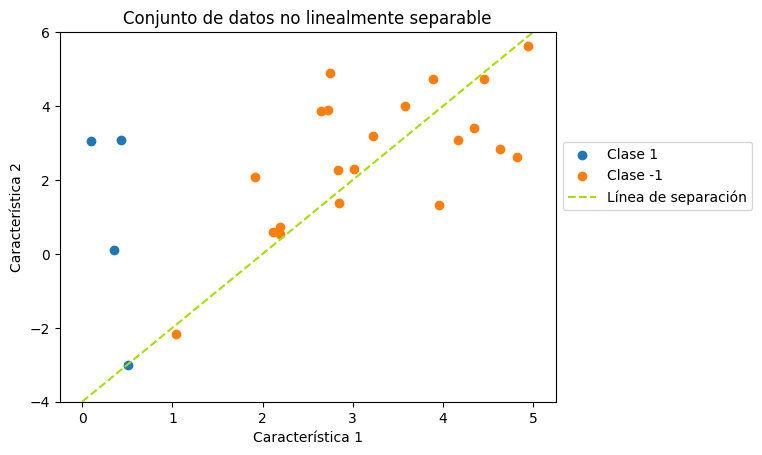

In [32]:
# Definir linea de separacion
def mal_separador(x):
    return 2 * x**2 - 4

y_real = np.where(x2 >= mal_separador(x1), 1, -1)

# Visualizar los datos
plt.scatter(x1[y_real == 1], x2[y_real == 1], label='Clase 1')
plt.scatter(x1[y_real == -1], x2[y_real == -1], label='Clase -1')
plt.plot(np.linspace(0,5,100), separador(np.linspace(0,5,100)), color='#A5DF00', linestyle='--', label='Línea de separación')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend(loc='lower left',bbox_to_anchor=(1, 0.5))
plt.title('Conjunto de datos no linealmente separable')
plt.ylim(bottom=-4,top=6)
plt.show()

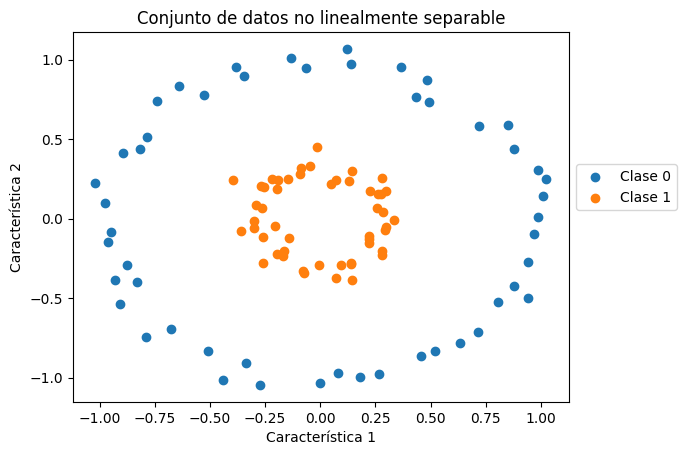

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# Generar un conjunto de datos que no es linealmente separable
X, y = make_circles(n_samples=100, factor=0.3, noise=0.05)

# Visualizar los datos
plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Clase 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Clase 1')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend(loc='lower left',bbox_to_anchor=(1, 0.5))
plt.title('Conjunto de datos no linealmente separable')
plt.show()

## Ejercico N 2
### Segmentación de imagen

#### ___Carga de las imagenes___

In [ ]:
import cv2
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

# Lista para cargar cada imagen

rutas_imagenes = [
    '../imagenes/vaca.jpg',
    '../imagenes/cielo.jpg',
    '../imagenes/pasto.jpg'
]

# Lista con las imagenes y se cargan las imagenes
imagenes = [cv2.imread(ruta) for ruta in rutas_imagenes if cv2.imread(ruta) is not None]

# Se crea una lista con los nombres de cada imagen
nombre_imagenes = ['vaca', 'cielo', 'pasto']

# Se crea un diccionario para almacenar las imagenes con nombres
dic_imagenes = {nombre: imagen for nombre, imagen in zip (nombre_imagenes, imagenes)}


# Se imprime el tamaño de cada imagen
# Altura - Ancho - Canales 
for nombre, imagen in dic_imagenes.items():
    print(f'Nombre: {nombre}, Tamaño: {imagen.shape}')

#### Redimenzionar las Imagenes

In [ ]:
# Obtener el alto y ancho maximo 

altura_max = max(imagen.shape[0] for imagen in dic_imagenes.values())
ancho_max = max(imagen.shape[1] for imagen in dic_imagenes.values())

# Redoimenzionar las imagenes para que sean todas iguales
dic_imagenes = {nombre: cv2.resize(imagen,(ancho_max, altura_max)) for nombre, imagen in dic_imagenes.items()}

for nombre, imagen in dic_imagenes.items():
    print(f'Nombre: {nombre}, Tamaño: {imagen.shape}')

### Construcción de los conjunto de datos

In [ ]:
import pandas as pd
# Define tus etiquetas de clase
etiquetas = {
    'vaca': 0,
    'cielo': 1,
    'pasto': 2
}

# Listas para almacenar datos
datos = []
etiqueta_column = []

# Itera sobre el diccionario de imágenes
for nombre, imagen in dic_imagenes.items():
    # Extrae los valores RGB de la imagen y aplana la lista de píxeles
    valores_rgb = imagen.reshape(-1, 3)
    
    # Repite la etiqueta para cada píxel en la imagen
    etiqueta = [etiquetas[nombre]] * valores_rgb.shape[0]
    
    # Agrega los datos y etiquetas a las listas
    datos.extend(valores_rgb)
    etiqueta_column.extend(etiqueta)

# Crea un DataFrame de pandas
df = pd.DataFrame(datos, columns=['R', 'G', 'B'])
df['Etiqueta'] = etiqueta_column



### Describe el contenido del dataset

In [ ]:
df.describe()

### Separar los conjuntos de entranamiento y prueba

In [ ]:
from sklearn.utils import shuffle

'''
    El dataset se encuentra ordenado por etiqueta,
    esto puede introducir un sesgo en los datos si se dividen 
    directamente en conjunto de entrenamiento, prueba.
    Por lo tanto se desordena el dataset par garantizar que los datos de
    entrenamiento y prueba sean mas representativos
'''
# Se desordena el dataset
df = shuffle(df, random_state=50)


#### Division del conjunto de datos en entrenamiento y prueba

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['R','G','B']] # Caracteristicas
y = df['Etiqueta']

# Se divide los datos en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


### Crear el modelo SVM

In [ ]:
from sklearn.svm import SVC
from tqdm import tqdm  

# Encuentra el mejor valor C
C = 10
# Entrenamos el modelo con el conjunto de entrenamiento
svm = SVC(kernel='linear',C=C, random_state=42)
svm.fit(X_train, y_train)

# Predecimos con el conjunto de prueba
predicciones = svm.predict(X_test)

In [ ]:
from tqdm import tqdm  # Importa tqdm para la barra de progreso

# Carga la imagen grande
imagen_grande = cv2.imread('../imagenes/cow.jpg')

# Obtener el tamaño de la imagen 
alto_imagen, ancho_imagen, _ = imagen_grande.shape
# Define el tamaño de la ventana deslizante
ventana_alto = 100
ventana_ancho = 100
paso_x = 10  # Tamaño de desplazamiento horizontal
paso_y = 10  # Tamaño de desplazamiento vertical

# Calcula el número total de iteraciones
total_iteraciones = ((imagen_grande.shape[0] - ventana_alto) // paso_y + 1) * ((imagen_grande.shape[1] - ventana_ancho) // paso_x + 1)

# Desliza la ventana a través de la imagen
with tqdm(total=total_iteraciones) as pbar:
    for y in range(0, imagen_grande.shape[0] - ventana_alto, paso_y):
        for x in range(0, imagen_grande.shape[1] - ventana_ancho, paso_x):
            # Extrae la región de la imagen
            region = imagen_grande[y:y+ventana_alto, x:x+ventana_ancho]

            # Realiza la predicción con el modelo SVM
            caracteristicas_region = region.reshape(-1, 3)  # Asegúrate de que coincida con las característica1s de tu modelo
            predicciones = svm.predict(caracteristicas_region)

            # Marca los puntos según la predicción
            for i, prediccion in enumerate(predicciones):
                punto_x = x + ventana_ancho // 2
                punto_y = y + ventana_alto // 2

                if prediccion == 0:
                    cv2.circle(imagen_grande, (punto_x, punto_y), 5, (0, 0, 255), -1)  # Marcar en rojo --> Vaca
                elif prediccion == 1:
                     cv2.circle(imagen_grande, (punto_x, punto_y), 5, (0, 255, 0), -1)  # Marcar en verde --> Cielo
                elif prediccion == 2:
                    cv2.circle(imagen_grande, (punto_x, punto_y), 5, (255, 0, 0), -1)  # Marcar en azul  --> Pasto
            pbar.update(1)

# Muestra la imagen con las marcas
cv2.namedWindow("Imagen con Predicciones", cv2.WINDOW_NORMAL)
cv2.imshow('Imagen con Predicciones', imagen_grande)
cv2.waitKey(-1)
cv2.destroyAllWindows()
